**`BODI AYISSI DONALD`**, `17B2063 donald.bodi@facsciences-uy1.cm` 

Department of Physics - Faculty of Science - University of Yaoundé I

`PNR`

`10/07/2023`

Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

Cette molécule présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. A partir de site de [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498), donner, **dans votre cahier de composition**, sa formule moléculaire et son poids moléculaire.
2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 
3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre de liaisons donneurs d'hydrogènes  et nombre de liaisons accepteurs d'hydrogènes. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**
4. Utiliser `rdkit.Chem.AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire, à partir de `mol` (molécule rdkit) de la question 2. dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN. 
   
   ```python
    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'votre_nom_4CzIPN.xyz')
    ```

5. Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.
6. Utiliser `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

    et par la méthode `CzIPN_mol.build().get_enuc()`, obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.
7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [8]:
import rdkit
import pyscf
print(rdkit.__version__)
print(pyscf.__version__)

2022.09.5
2.2.1


2. Reprentons en 2d

Utilisation de rdkit.Chem.MolFromSmiles


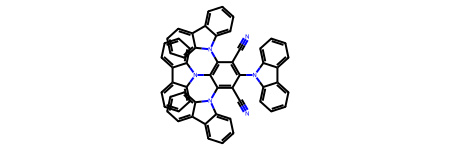

In [9]:
from rdkit import Chem
mol = Chem.MolFromSmiles('C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N')
print('Utilisation de rdkit.Chem.MolFromSmiles')
mol

Utilisation de rdkit.Chem.AllChem


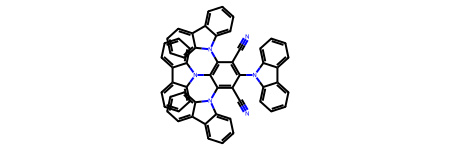

In [10]:
from rdkit.Chem import AllChem
print('Utilisation de rdkit.Chem.AllChem')
mol = AllChem.MolFromSmiles('C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N')
mol

3. Evaluons les proprietes physico-chimique

In [25]:
from rdkit.Chem import Descriptors
mol_poid = Descriptors.ExactMolWt(mol)
mol_poid_moyen = Descriptors.MolWt(mol)
mol_nb_liaison_don = Descriptors.NumValenceElectrons(mol)
mol_nb_liaison_acc = Descriptors.NumRadicalElectrons(mol)

print(f'poids {mol_poid}')
print(f'poids moyen {mol_poid_moyen}')
print(f'laisons donnateurs {mol_nb_liaison_don}')
print(f'laisons accepteurs {mol_nb_liaison_acc}')

poids 788.268845024
poids moyen 788.9139999999999
laisons donnateurs 286
laisons accepteurs 0


4. Coordonnees de la molecule

In [29]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import AllChem

mol = AllChem.MolFromSmiles('C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N')
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)
Chem.MolToXYZFile(mol, 'BODI_AYISSI_DONALD_4CzIPN.xyz')

6. Utilisons pyscf.gto

In [31]:
CzIPN_mol = pyscf.gto.M(atom=open('BODI_AYISSI_DONALD_4CzIPN.xyz').read(),
 charge=0,
 spin=0,
 basis='631g*',
 unit='Angstrom')
print(f"Valeur de l'energie nucleaire de la molecule : {CzIPN_mol.build().get_enuc()}")

Valeur de l'energie nucleaire de la molecule : 8751.620127456048


7. Etat fondamentale de la molecule

In [37]:
from qiskit.opflow.operator_globals import H, I, S
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_problem = CzIPN_mol.run()
transformer = FreezeCoreTransformer()

from qiskit_nature.second_q.mappers import (
    ParityMapper,
    JordanWignerMapper,
    BravyiKitaevMapper, 
    QubitConverter
)

def qubit_converter(mapper):
    """A mapper instance used to convert second quantized to qubit operators

    Args:
        mapper : Mapper string that can be "PM" or "JWM" or "BKM"
                
    Returns: The QubitConverter instance
    """    
    return QubitConverter(mapper)

def ansatz(converter):
    """Ansatz function

    Args:
        converter : the output of the function qubit_converter(mapper)

    Returns: The anstatz
    """    
    
    ansatz = UCCSD(
        H2_problem.num_spatial_orbitals,
        H2_problem.num_particles,
        converter,
        initial_state=HartreeFock(
            H2_problem.num_spatial_orbitals,
            H2_problem.num_particles,
            converter,
        ),
    )
    return ansatz

from qiskit.primitives import Estimator

estimator = Estimator()

from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np

def vqe_solver(converter, optimizer):
    """ Setup VQE solver

    Args:
        converter : qubit converter 
        optimizer : optimizer

    Returns: vqe solver
    """    
    vqe_solver = VQE(estimator, ansatz(converter), optimizer)

    vqe_solver.initial_point = np.zeros(ansatz(converter).num_parameters)
    return vqe_solver

def run_vqe(problem, solver, mapper, optimizer = "SLSQP", show=True):
    """Computing of the molecular ground state with the `GroundStateEigensolver`
class 
    Args:
        problem :  Electronic structure problem

        mapper : Mapper string that can be "PM" or "JWM" or "BKM"
        
        optimizer :  Optimizer string that can be either "SPSA" or "SLSQP" or "L_BFGS_B"

        solver :  Sting that can be either "NumPy" or "VQE"
       
    Returns:
          The ground state of the molecule

    """    
    # Mapper
    dmap = {"JWM": JordanWignerMapper(), "PM": ParityMapper(),  "BKM": BravyiKitaevMapper()}
    for k, v in dmap.items():
        if k == mapper:        
            q_conv = qubit_converter(v)   
            
    if solver == "VQE":             
        # Optimizer
        dopt = {"SPSA": SPSA(), "SLSQP": SLSQP(), "L_BFGS_B": L_BFGS_B()}
        for n, m in dopt.items():
            if n == optimizer:        
                opt = m
        GS_solver = vqe_solver(q_conv, opt)

    # Solver
    if solver == "Numpy":
        GS_solver = NumPyMinimumEigensolver()

    # Ground state computation using a minimum eigensolver. Returns the solver.
    Algo = GroundStateEigensolver(q_conv, GS_solver) 
    
    # Leveraging Qiskit Runtime
    start = time.time()
    
    # Compute Ground State properties.
    ground_state = Algo.solve(problem)
    elapsed = str(datetime.timedelta(seconds = time.time()- start))
    
    if show:
        print(f'Running {solver} and {mapper} mapper')
        if solver == "VQE":
            print(f'With {optimizer} optimizer and UCCSD ansatz')
        print(f'Elapsed time: {elapsed} \n')

        print(ground_state.total_energies[0])

    if solver == "VQE":
        return ground_state, elapsed, mapper, solver, optimizer
    else:
        return ground_state, elapsed, mapper, solver
    
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime

res_vqe = run_vqe(H2_problem, mapper="PM", optimizer="SLSQP", solver="VQE")


AttributeError: Mole object does not have method num_spatial_orbitals

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table